In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

Задание №1
Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

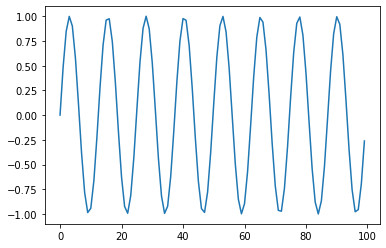

In [5]:
#a) f(x) = sin(x), где D(f)=(-inf,+inf)
x = np.array([np.sin(xx) for xx in np.linspace(0, 50, 100)])
plt.plot(x)

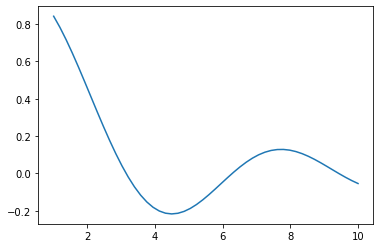

In [8]:
#b) f(x) = sin(x)/x, где D(f)=(1,10)
def f(x):
    #return x**3 + 2*x**2+4*x+5
    return np.sin(x)/x
x = np.linspace(1, 10)
fx = f(x)
plt.plot(x, fx, label='function')

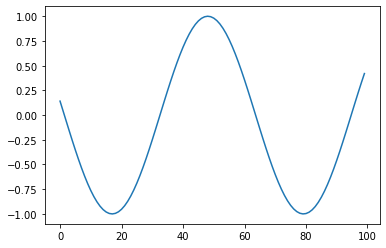

In [9]:
#c) f(x) = sin(x+3), где D(f)=(0,10)
x = np.array([np.sin(xx) for xx in np.linspace(0, 10, 100)+3])
plt.plot(x)

In [10]:
#d*) np.sqrt(x-8)+np.sqrt(8-x) D(f)=8


## Задание 3
Посчитайте частные производные функции в точкe (на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [11]:
def func(x,a,b,c,d):
    return a*x[0]**2*x[1]**3 + b/x[0] + x[1]**2*x[0]+d

In [12]:
x = [1,2]
a, b, c, d = (2, 1, 1,7)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], a, b, c, d)

array([35.00000024, 28.00000024])

## Задание 4
Градиентный спуск своими руками

In [13]:
def f(x):
    return (x[0]**2) + (x[1]**2)

In [21]:
x = np.array([100, 200])
b = x.copy()
lr = 0.1

In [22]:
for i in range(100):
    # Calculate gradient
    eps = np.sqrt(np.finfo(float).eps)
    #grad = approx_fprime(x, func, [eps, eps], c0, c1)# Your code here (функция для вычисления градиента есть в лекционном ноутбуке)
    grad = approx_fprime(x, f,[eps, eps])
    # Update x with gradient
    x = x-lr*grad# Your code here (смотри слайд презентации про градиентный спуск)

In [23]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15


Проверка с помощью встроенной функции scipy:

In [29]:
res = minimize(f, b, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164


In [31]:
xmin0 = fmin(f,b)
xmin0

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 59
         Function evaluations: 112


array([ 3.12645005e-05, -2.53507530e-05])